In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tkinter import E

# import Data miners 2022 (answers).csv from the same directory as this file and create a dataframe called df
df = pd.read_csv('Data miners 2022 (answers).csv')

#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

# Assign all points to class 0
df['class'] = 0

#remove all columns but shoe_size, height, and class
df = df[['shoe_size', 'height', 'class']]

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

#normalize the data
df['height'] = df['height'] / max(df['height']) 
df['shoe_size'] = df['shoe_size'] / max(df['shoe_size']) 




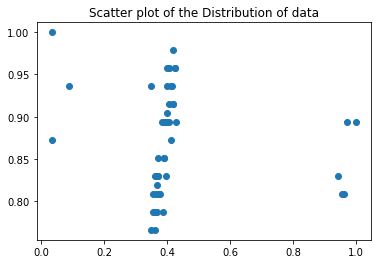

In [186]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['height'],df['shoe_size']) # Visualizing the distribution
plt.show()

In [187]:
def initializeMeans(df):
    
    # Randomly initialize the means
    mean1 = df.iloc[random.randint(0,len(df)-1)]
    mean2 = df.iloc[random.randint(0,len(df)-1)]
    mean3 = df.iloc[random.randint(0,len(df)-1)]

    return mean1, mean2, mean3

In [188]:

def euclideanDist(df,pointIDX,mean1,mean2, mean3):

    # Calculate the euclidean distance between the point and the two means
    dist1 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean1['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean1['height'])**2)
    dist2 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean2['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean2['height'])**2)
    dist3 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean2['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean3['height'])**2)
    
    # Assign the point to the mean with the smallest distance
    if dist1 < dist2 and dist1 < dist3:
        df['class'][pointIDX] = 1
    elif dist2 < dist1 and dist2 < dist3:
        df['class'][pointIDX] = 2
    else:
        df['class'][pointIDX] = 3
    return df

m1, m2, m3 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2,m3)

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3


In [189]:
def updateMean(df):
    #function calculates the mean of the points in each class

    mean1 = df.loc[df['class']==1].mean()
    mean2 = df.loc[df['class']==2].mean()
    mean3 = df.loc[df['class']==3].mean()
    
    return mean1, mean2, mean3

Iteration 0/0


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 1/1


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 2/2


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 3/3


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 4/4


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/3358861113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

<Figure size 432x288 with 0 Axes>

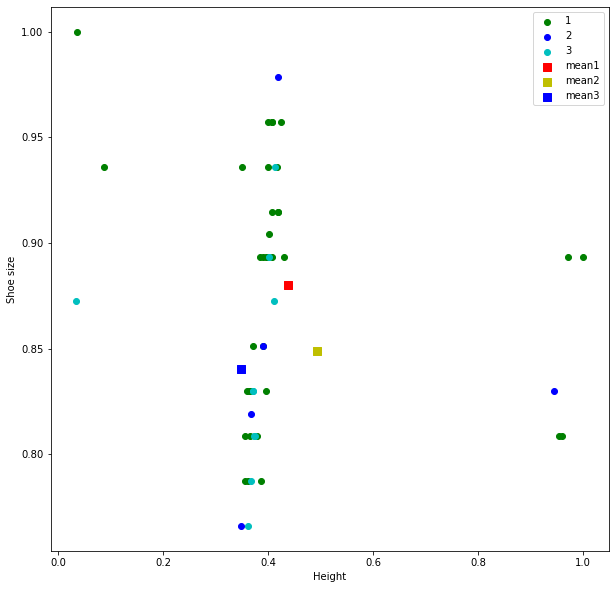

In [190]:
def Kmeans(df,iterations):

    # Initialize the means
    mean1, mean2, mean3 = initializeMeans(df)

    # Run the Kmeans algorithm
    for iteration in range(iterations):

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2, mean3)
            
        mean1, mean2, mean3 = updateMean(df)

    return df, mean1, mean2, mean3

df, mean1, mean2, mean3 = Kmeans(df,5)


plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.loc[df['class'] == 1]['height'],df.loc[df['class'] == 1]['shoe_size'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['height'],df.loc[df['class'] == 2]['shoe_size'],color='b',label='2')  #
plt.scatter(df.loc[df['class'] == 3]['height'],df.loc[df['class'] == 3]['shoe_size'],color='c',label='3')  #

plt.scatter(mean1['height'],mean1['shoe_size'],s=70,label='mean1',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['height'],mean2['shoe_size'],s=70,label='mean2',marker='s',color='y') 
plt.scatter(mean3['height'],mean3['shoe_size'],s=70,label='mean3',marker='s',color='b')   


plt.xlabel('Height')
plt.ylabel('Shoe size')

plt.legend()                                                                                                #
plt.show()
